# ML Models for Fraud Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, roc_curve,auc,roc_auc_score, f1_score,precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

##  Universal function that runs the classifier on:
1. Original data
2. SMOTE Oversampled Data
3. Ramdom Undersampled Data

In [2]:
def run_classifier(clf,Clasifier_name):
    sns.set_context(rc={'font.size': 16})
    ##Original Data
    clf.fit(data_features_train, data_labels_train.ravel())
    test_results = clf.predict(data_features_test)
    test_results_prob = clf.predict_proba(data_features_test)[:,(1)]
    print('------------------------------------------Original Data*------------------------------------------')
    fpr, tpr,_=roc_curve(data_labels_test,test_results_prob,drop_intermediate=False)
    precision,recall, _=precision_recall_curve(data_labels_test,test_results_prob)
    ROC_auc='{:.3}'.format(roc_auc_score(data_labels_test,test_results))
    PR_f1='{:.3}'.format(1-f1_score(data_labels_test,test_results))
    print_results(test_results,ROC_auc,PR_f1)
    draw_roc(fpr,tpr,precision,recall,ROC_auc,PR_f1,Clasifier_name+' with Original data')

    ##SMOTE Oversampling
    clf.fit(x_train_smote, y_train_smote.ravel())
    test_results = clf.predict(data_features_test)
    test_results_prob = clf.predict_proba(data_features_test)[:,(1)]
    print('------------------------------------------SMOTE OverSampling*------------------------------------------')
    fpr, tpr,_=roc_curve(data_labels_test,test_results_prob,drop_intermediate=False)
    precision,recall, _=precision_recall_curve(data_labels_test,test_results_prob)
    ROC_auc='{:.3}'.format(roc_auc_score(data_labels_test,test_results))
    PR_f1='{:.3}'.format(1-f1_score(data_labels_test,test_results))
    print_results(test_results,ROC_auc,PR_f1)
    draw_roc(fpr,tpr,precision,recall,ROC_auc,PR_f1,Clasifier_name+' with SMOTE OverSampling')

    ##Random Undersampling
    clf.fit(x_train_rus, y_train_rus.ravel())
    test_results = clf.predict(data_features_test)
    test_results_prob = clf.predict_proba(data_features_test)[:,(1)]
    print('------------------------------------------Random UnderSampling*------------------------------------------')
    fpr, tpr,_=roc_curve(data_labels_test,test_results_prob,drop_intermediate=False)
    precision,recall, _=precision_recall_curve(data_labels_test,test_results_prob)
    ROC_auc='{:.3}'.format(roc_auc_score(data_labels_test,test_results))
    PR_f1='{:.3}'.format(1-f1_score(data_labels_test,test_results))
    print_results(test_results,ROC_auc,PR_f1)
    draw_roc(fpr,tpr,precision,recall,ROC_auc,PR_f1,Clasifier_name+' with Random UnderSampling')

###  Function to print the Performance metric's of the classifier

In [3]:
def print_results(test_results,ROC_auc,PR_auc):
    sns.set_context(rc={'font.size': 16})
    print('Accuracy','{:.2%}'.format(clf.score(data_features_test, data_labels_test)),' *Inaccurate metric for imbalanced class')
    print('ROC AUC Score',ROC_auc)
    print('PR F1 Score',PR_auc)
    print('Confusion Matrix')
    cm=confusion_matrix(data_labels_test,test_results)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Normalized Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(2)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    plt.xticks(tick_marks, ['Authentic','Fraud'],fontsize=10)
    plt.yticks(tick_marks, ['Authentic','Fraud'],fontsize=10)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '0.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True Class',fontsize=12)
    plt.xlabel('Predicted Class',fontsize=12)
    plt.tight_layout()
    

### Function to draw ROC curve for the classifier

In [4]:
def draw_roc(fpr,tpr,precision,recall,ROC_auc,PR_f1,title):
    plt.figure(figsize=(10,10))
    ##Adding the ROC
    sns.lineplot(fpr, tpr, lw=2, label="ROC AUC - "+ROC_auc).set_title('AUC curve for '+title)
    sns.lineplot(precision, recall, lw=2, label="PR F1 - "+PR_f1)
    ##Random FPR and TPR
    sns.lineplot([0, 1], [0, 1], lw=2,linestyle='--')
    ##Title and label
    plt.xlabel('FPR',fontsize=20)
    plt.ylabel('TPR',fontsize=20)
    plt.show()

### Loading data from file

In [5]:
data = pd.read_csv("creditcard.csv")

Sample record

In [6]:
data.iloc[0]

Time        0.000000
V1         -1.359807
V2         -0.072781
V3          2.536347
V4          1.378155
V5         -0.338321
V6          0.462388
V7          0.239599
V8          0.098698
V9          0.363787
V10         0.090794
V11        -0.551600
V12        -0.617801
V13        -0.991390
V14        -0.311169
V15         1.468177
V16        -0.470401
V17         0.207971
V18         0.025791
V19         0.403993
V20         0.251412
V21        -0.018307
V22         0.277838
V23        -0.110474
V24         0.066928
V25         0.128539
V26        -0.189115
V27         0.133558
V28        -0.021053
Amount    149.620000
Class       0.000000
Name: 0, dtype: float64

Class distribuition  
0 - Authentic Transactions  
1 - Fraudulent Transactions

In [7]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

###### Standardizing the Amount variable

In [10]:
data["Normalized Amount"] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop(["Time","Amount"],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


# Using Random Forest Classifier to weigh feature importance

### Function to split the original data into Train and Test subsets

In [8]:
def UD_train_test_split(x): 
    x_features= x.loc[:,x.columns != "Class"]
    x_labels=x.loc[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("Records in Training data:",len(x_features_train))
    print("Records in Test data:",len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train.values,x_labels_test.values)

### Train Test Split - (All Features Included)

In [9]:
data_features_train,data_features_test,data_labels_train,data_labels_test=UD_train_test_split(data) 

Records in Training data: 199364
Records in Test data: 85443


#### Creating SMOTE Oversampled train dataset

In [11]:
sm = SMOTE(random_state=12, ratio = 'minority')
x_train_smote, y_train_smote = sm.fit_sample(data_features_train, data_labels_train.ravel())

#### Creating Random Undersampled train dataset

In [12]:
rus = RandomUnderSampler(random_state=12)
x_train_rus, y_train_rus = rus.fit_sample(data_features_train, data_labels_train.ravel())

------------------------------------------Original Data*------------------------------------------
Accuracy 99.96%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.889
PR F1 Score 0.138
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


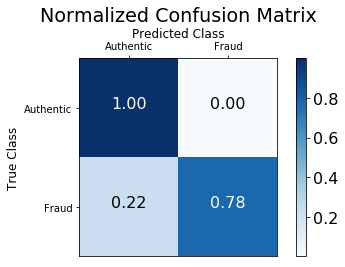

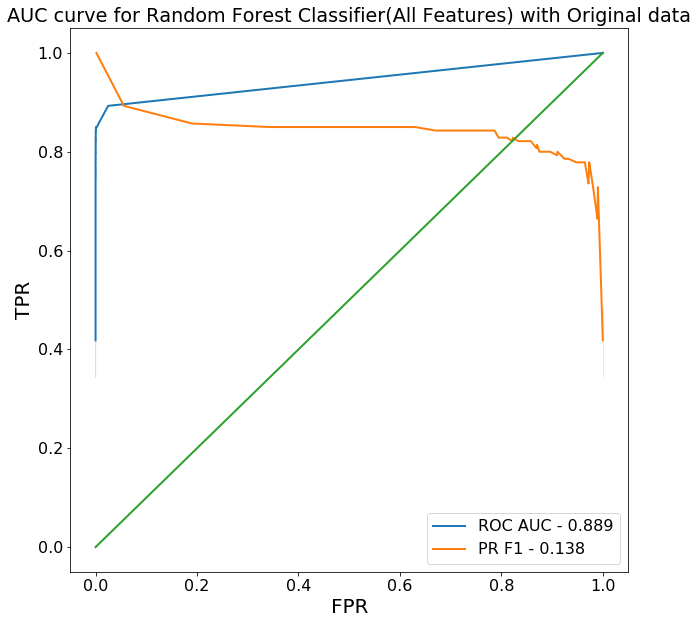

------------------------------------------SMOTE OverSampling*------------------------------------------
Accuracy 99.95%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.903
PR F1 Score 0.16
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


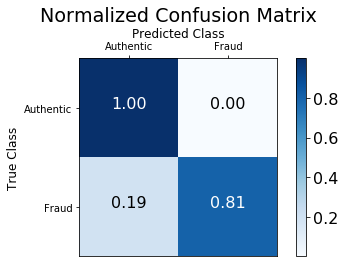

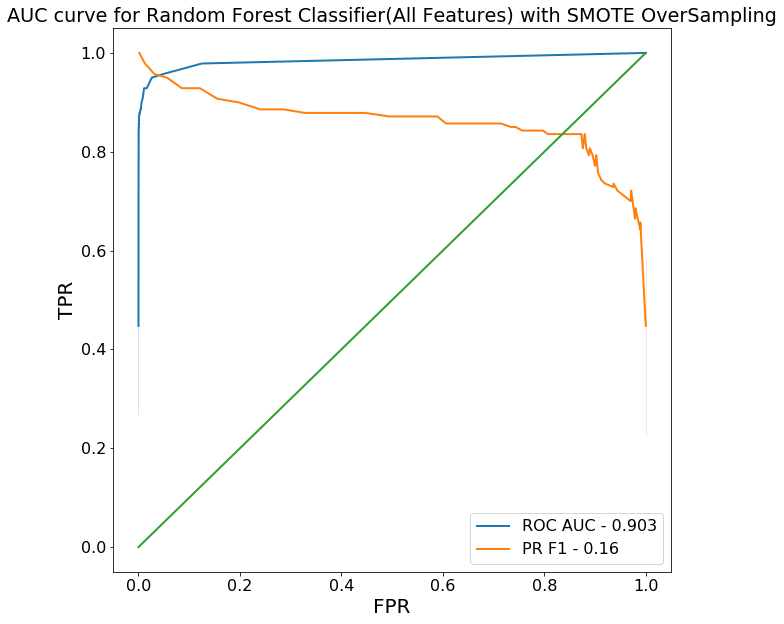

------------------------------------------Random UnderSampling*------------------------------------------
Accuracy 96.80%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.938
PR F1 Score 0.915
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


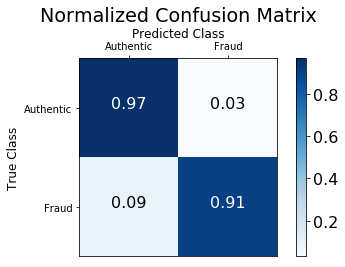

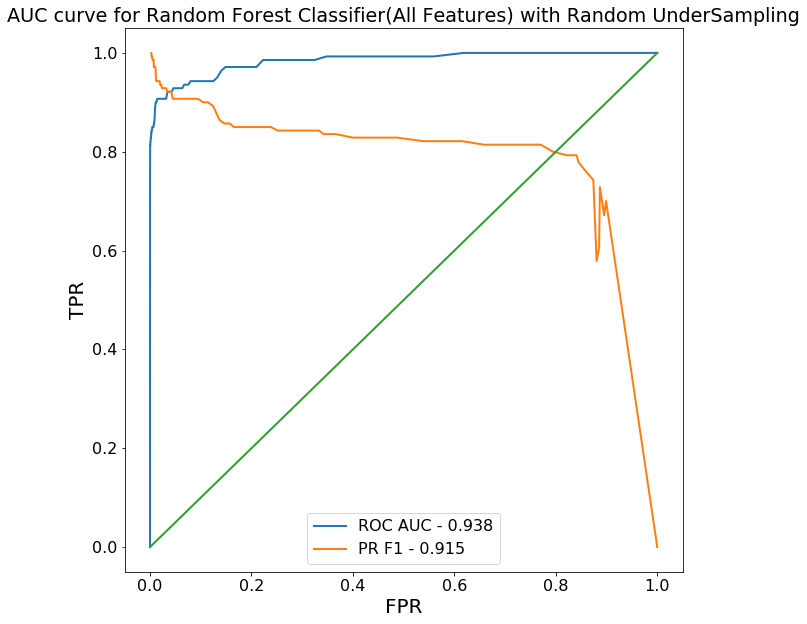

In [13]:
clf=RandomForestClassifier(n_estimators=100, random_state=12)
run_classifier(clf,"Random Forest Classifier(All Features)")

### Extracting feature importance

In [14]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = data_features_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

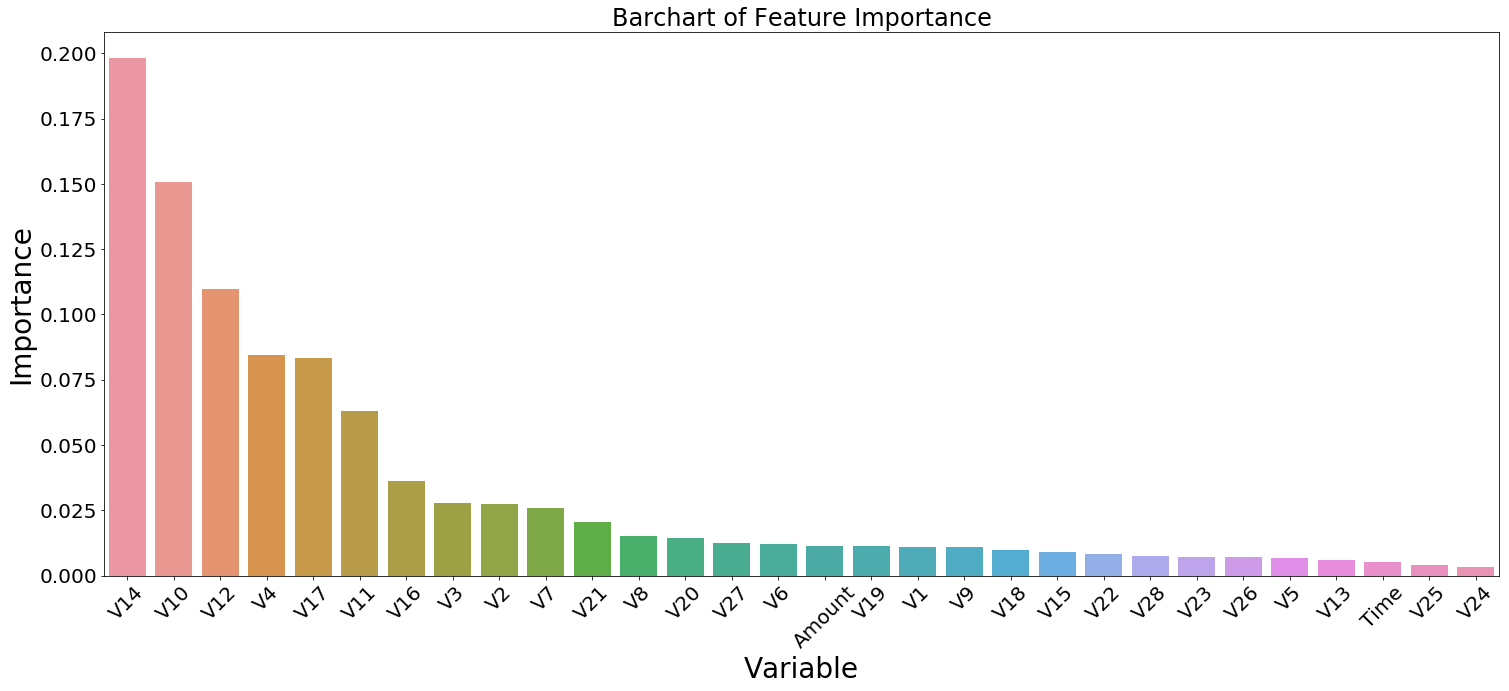

In [16]:
sns.set_context(rc={'font.size': 20})
plt.figure(figsize=(25,10))
sns.barplot(x=feature_importances.index,y=feature_importances.importance).set_title("Barchart of Feature Importance")
plt.ylabel('Importance',fontsize=28)
plt.xlabel('Variable',fontsize=28)
plt.xticks(rotation=45)

## Logistic Regression - (All Features Included)

------------------------------------------Original Data*------------------------------------------
Accuracy 97.97%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.958
PR F1 Score 0.869
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


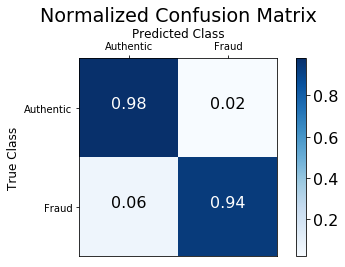

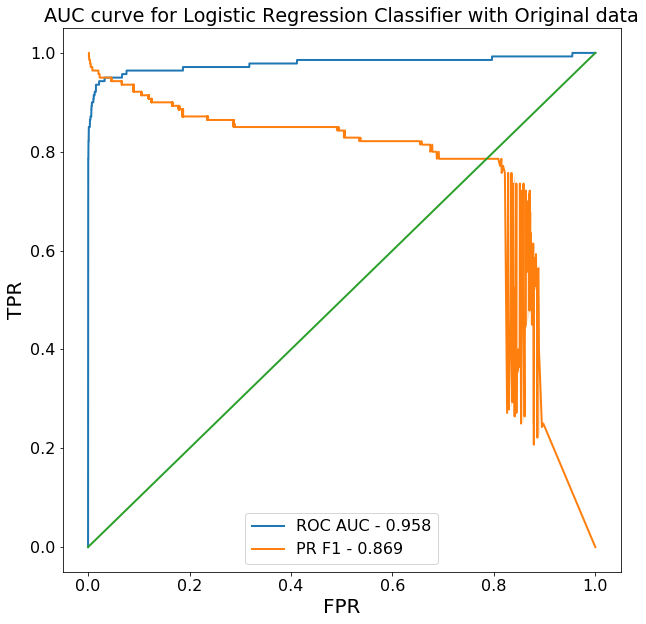

------------------------------------------SMOTE OverSampling*------------------------------------------
Accuracy 98.96%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.927
PR F1 Score 0.787
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


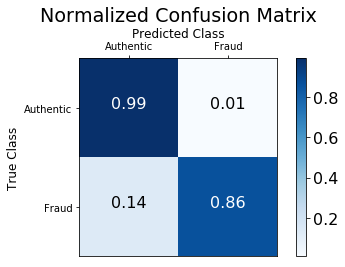

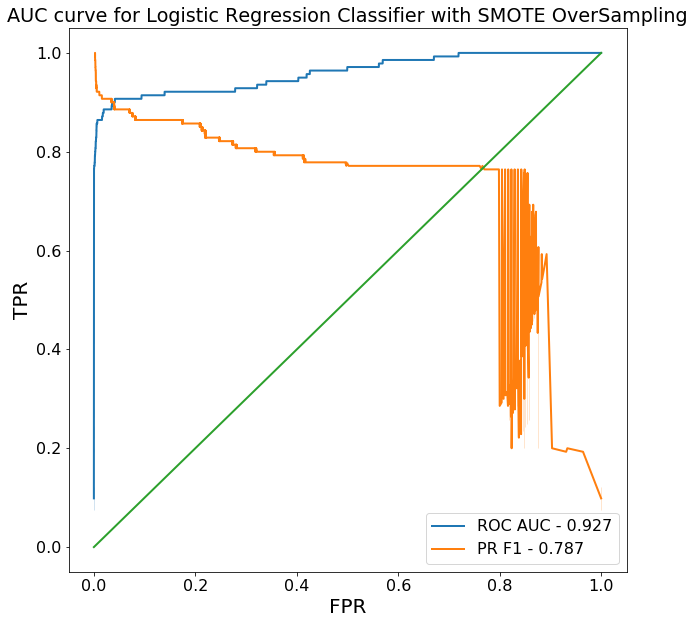

------------------------------------------Random UnderSampling*------------------------------------------
Accuracy 98.37%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.931
PR F1 Score 0.85
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


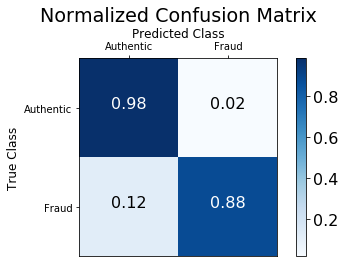

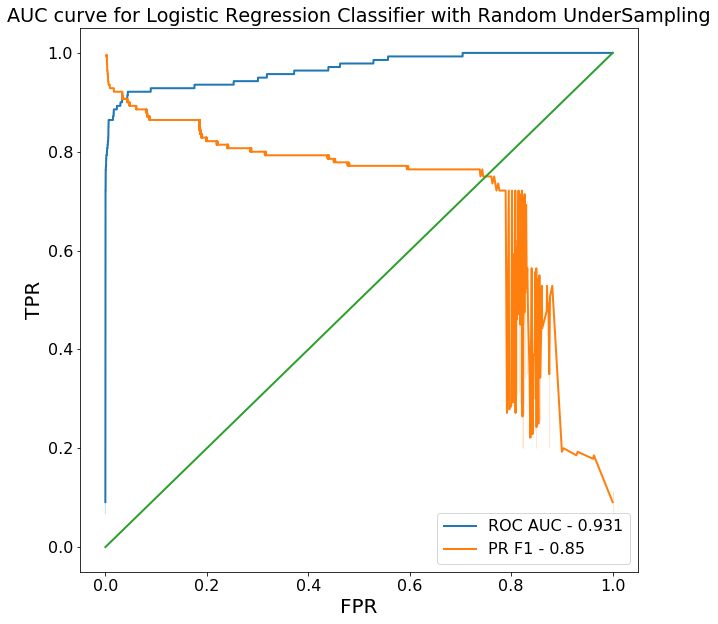

In [15]:
clf = LogisticRegression(class_weight='balanced', C = 0.01,penalty = 'l2',solver='liblinear')
run_classifier(clf,"Logistic Regression Classifier")

## Dimension reduction to Top 5 features

In [18]:
#MOST RELAVANT FEATURES
data1=data[["V14","V10","V12","V17","V11","Class"]]
data1.head()

,V14,V10,V12,V17,V11,Class
0,-0.311169,0.090794,-0.617801,0.207971,-0.551600,0
1,-0.143772,-0.166974,1.065235,-0.114805,1.612727,0
2,-0.165946,0.207643,0.066084,1.109969,0.624501,0
3,-0.287924,-0.054952,0.178228,-0.684093,-0.226487,0
4,-1.119670,0.753074,0.538196,-0.237033,-0.822843,0


Oversampling only on the training data(Using SMOTE)

### Test Train Split - Top 5 features

In [19]:
data_features_train,data_features_test,data_labels_train,data_labels_test=UD_train_test_split(data1) 

Records in Training data: 199364
Records in Test data: 85443


#### Creating SMOTE Oversampled train dataset

In [20]:
sm = SMOTE(random_state=12, ratio = 'minority')
x_train_smote, y_train_smote = sm.fit_sample(data_features_train, data_labels_train.ravel())

#### Creating Random Undersampled train dataset

In [21]:
rus = RandomUnderSampler(random_state=12)
x_train_rus, y_train_rus = rus.fit_sample(data_features_train, data_labels_train.ravel())

## Ensemble methods for unbalanced classes - Random Forest classifier (gini)

------------------------------------------Original Data*------------------------------------------
Accuracy 99.95%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.882
PR F1 Score 0.16
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


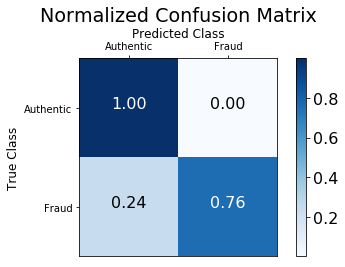

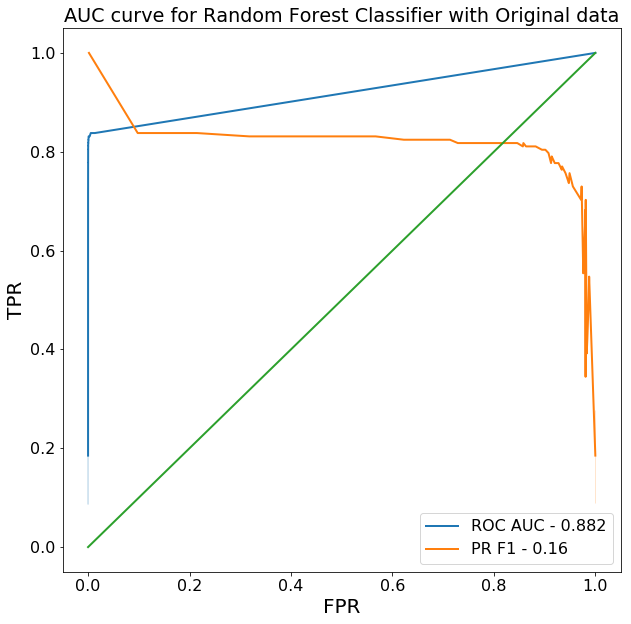

------------------------------------------SMOTE OverSampling*------------------------------------------
Accuracy 99.82%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.905
PR F1 Score 0.392
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


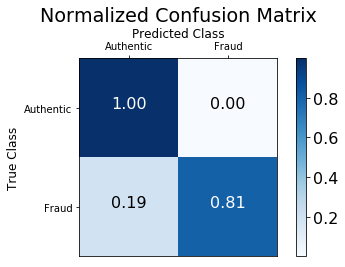

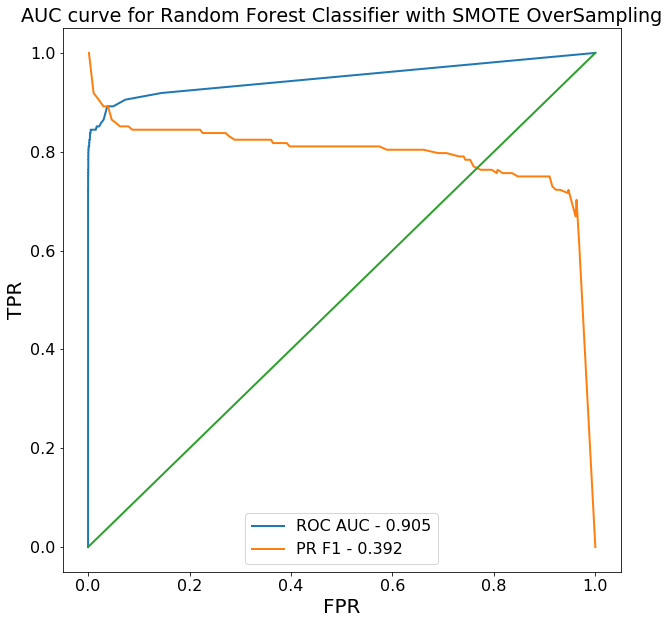

------------------------------------------Random UnderSampling*------------------------------------------
Accuracy 95.93%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.912
PR F1 Score 0.931
Confusion Matrix


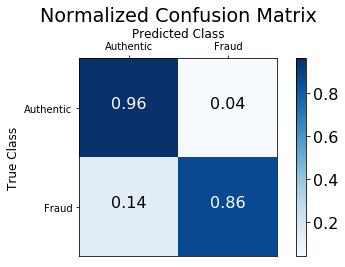

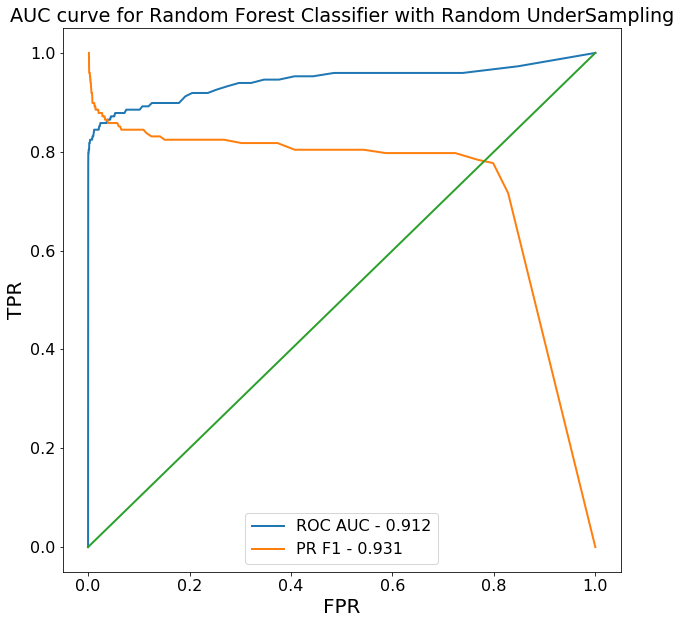

In [22]:
clf = RandomForestClassifier(n_estimators=100, random_state=12,criterion='gini')
run_classifier(clf,"Random Forest Classifier")

## Ensemble methods for unbalanced classes - Balanced bagging classifier

In [24]:
clf = BalancedBaggingClassifier(random_state=12)
run_classifier(clf,"Balanced Bagging Classifier")

TypeError: All intermediate steps of the chain should be estimators that implement fit and transform or sample (but not both) 'RandomUnderSampler(random_state=None, ratio='auto', replacement=False,
          return_indices=False)' (type <class 'imblearn.under_sampling.prototype_selection.random_under_sampler.RandomUnderSampler'>) doesn't)

## Ensemble methods for unbalanced classes - Logistic Regression classifier

------------------------------------------Original Data*------------------------------------------
Accuracy 97.80%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.915
PR F1 Score 0.882
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


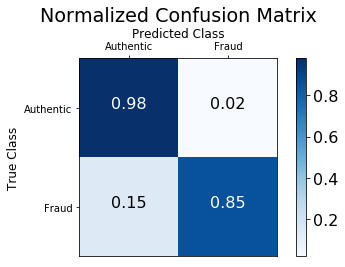

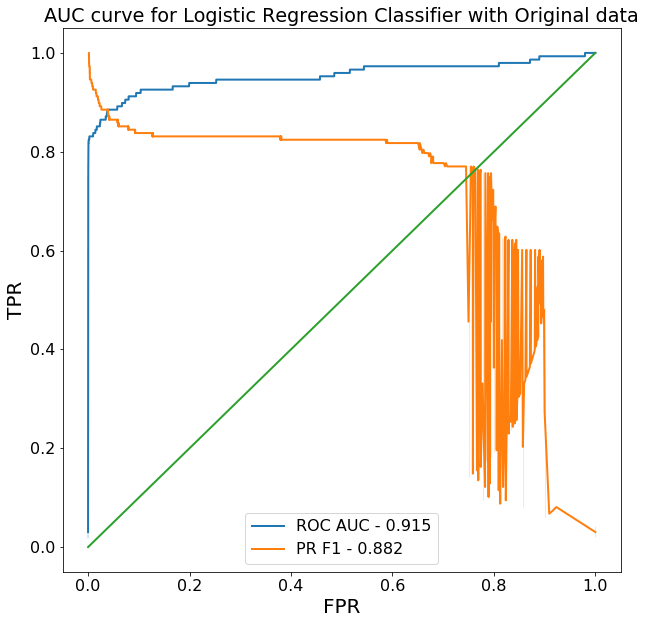

------------------------------------------SMOTE OverSampling*------------------------------------------
Accuracy 97.71%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.914
PR F1 Score 0.886
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


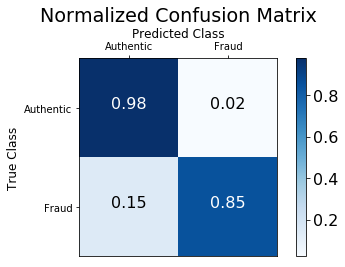

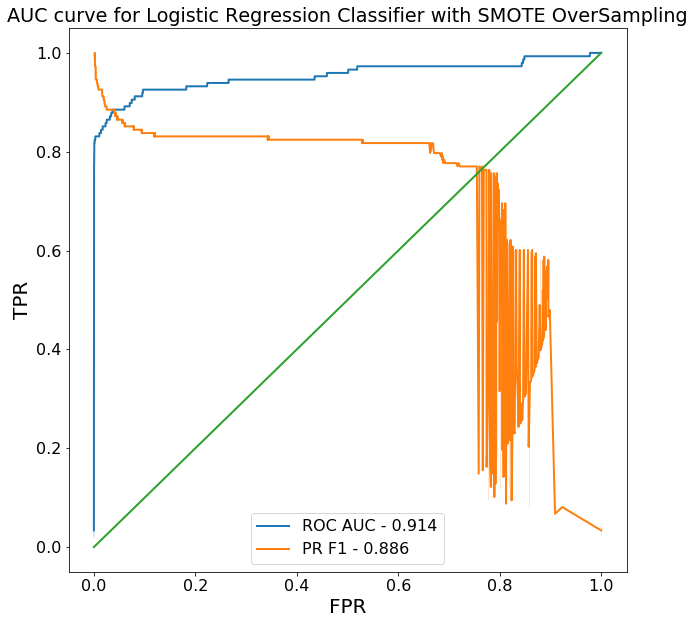

------------------------------------------Random UnderSampling*------------------------------------------
Accuracy 96.28%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.921
PR F1 Score 0.924
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


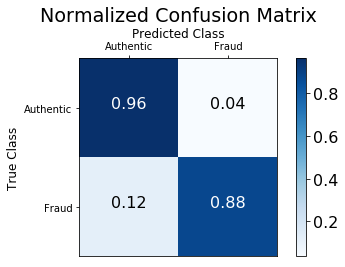

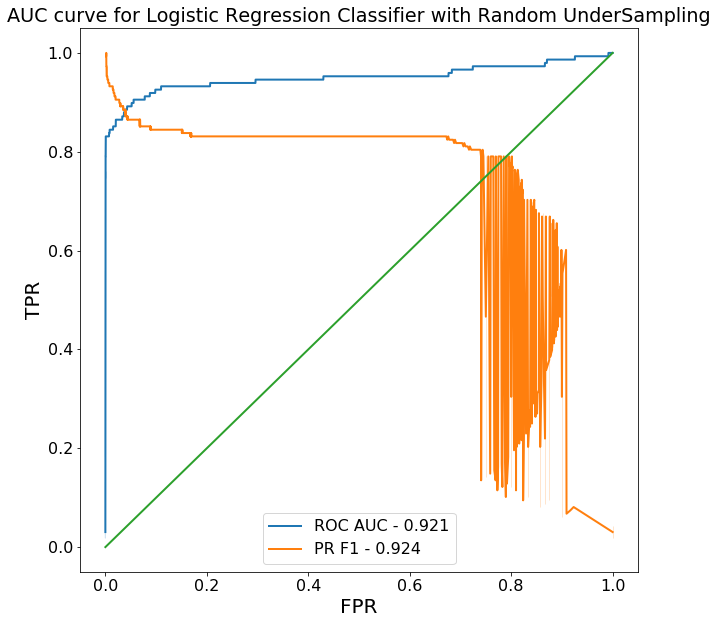

In [25]:
clf = LogisticRegression(class_weight='balanced', C = 0.01,penalty = 'l2',solver='liblinear')
run_classifier(clf,"Logistic Regression Classifier")

## Ensemble methods for unbalanced classes - XG Boost classifier

------------------------------------------Original Data*------------------------------------------
Accuracy 14.59%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.498
PR F1 Score 0.997
Confusion Matrix


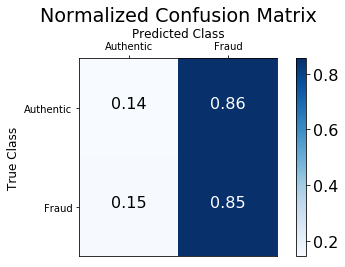

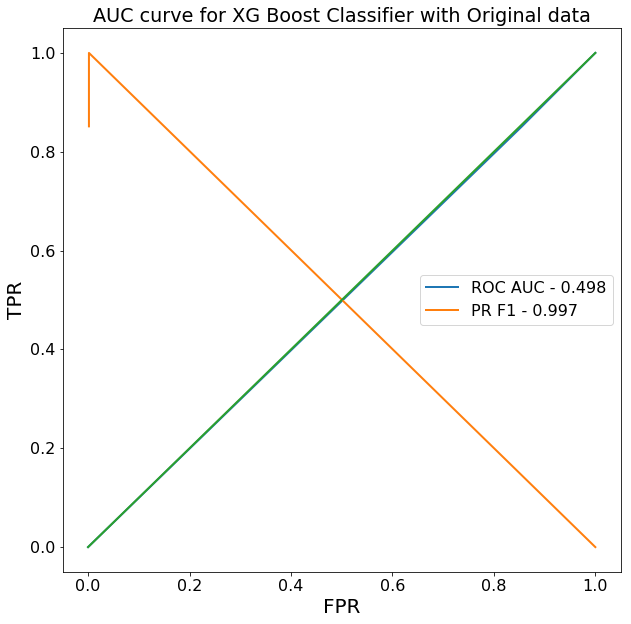

------------------------------------------SMOTE OverSampling*------------------------------------------
Accuracy 97.15%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.925
PR F1 Score 0.903
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


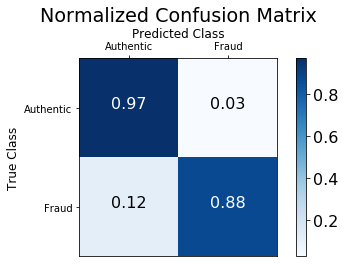

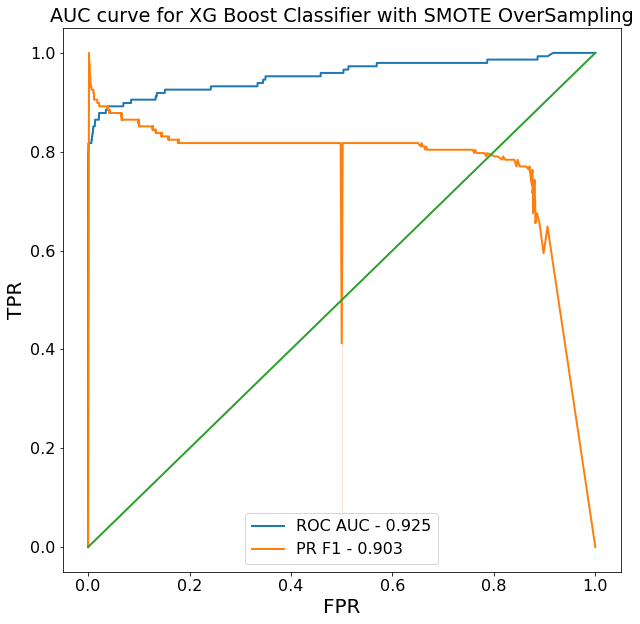

------------------------------------------Random UnderSampling*------------------------------------------
Accuracy 95.77%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.911
PR F1 Score 0.934
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


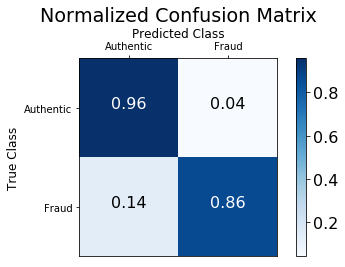

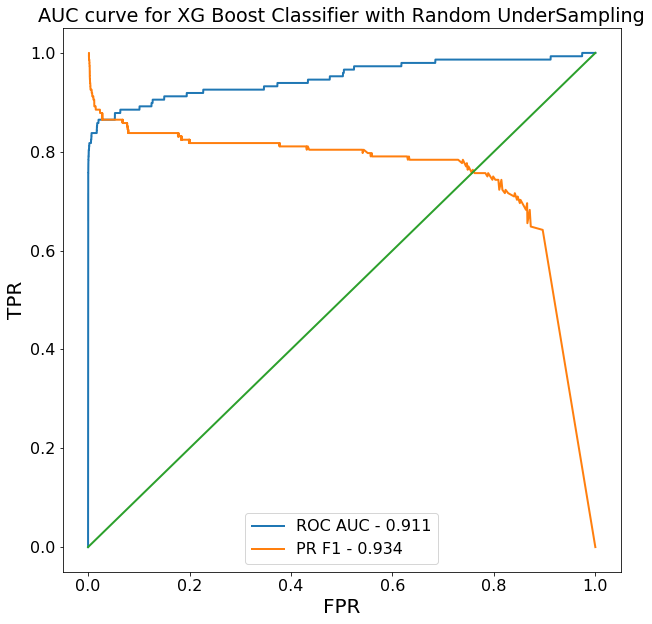

In [26]:
clf = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, min_samples_split=0.5, min_samples_leaf=45, max_depth=8,max_features ='sqrt',subsample =0.8)
run_classifier(clf,"XG Boost Classifier")

## Ensemble methods for unbalanced classes - Random Forest classifier (entropy)

------------------------------------------Original Data*------------------------------------------
Accuracy 99.95%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.892
PR F1 Score 0.153
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


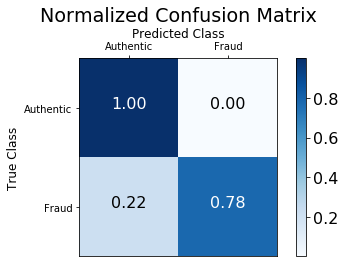

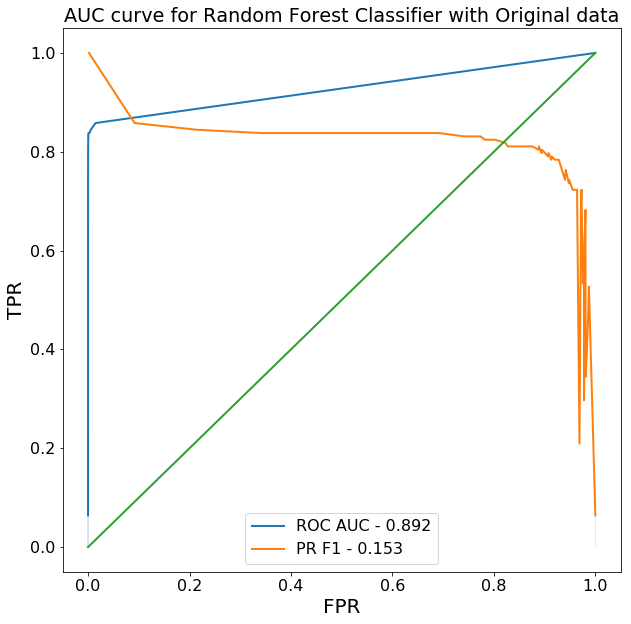

------------------------------------------SMOTE OverSampling*------------------------------------------
Accuracy 99.82%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.905
PR F1 Score 0.391
Confusion Matrix


c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


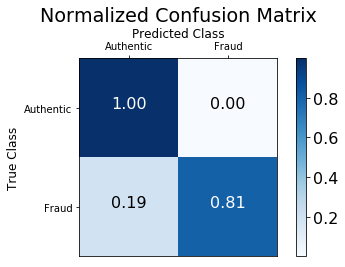

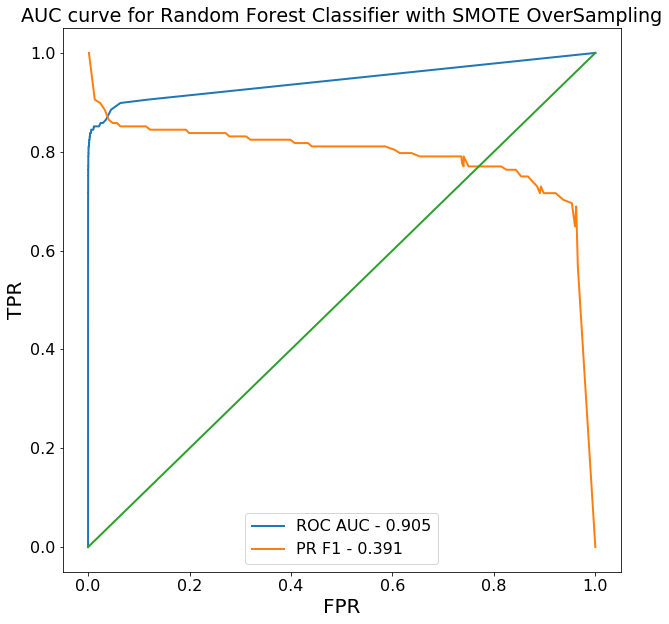

------------------------------------------Random UnderSampling*------------------------------------------
Accuracy 96.32%  *Inaccurate metric for imbalanced class
ROC AUC Score 0.914
PR F1 Score 0.925
Confusion Matrix


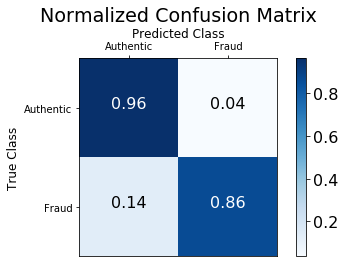

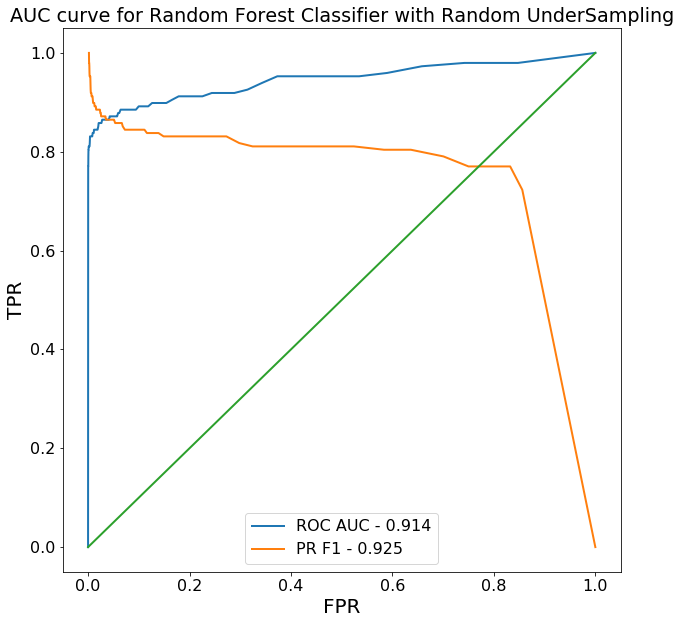

In [27]:
clf = RandomForestClassifier(n_estimators=100, random_state=12,criterion='entropy')
run_classifier(clf,"Random Forest Classifier")

END OF NOTEBOOK